# Customer Churn
perusahaan telekomunikasi ingin membuat model yang dapat memprediksi customer churn untuk melakukan penanagan lebih lanjut sebagai antisipasi pelanggan melakukan churn di kemudidan hari

# Data understanding
disini akan dilakukan pemeriksaan data seperti
1. info data
2. missing values
3. duplicated
4. inconsistence data
5. pengechekan outlier
6. visualisasi

In [ ]:
# import library
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
df_train = pd.read_csv('train.csv')

df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
df_train.sample()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2429,TX,121,area_code_415,no,no,0,86.1,100,14.64,259.8,113,22.08,148.0,79,6.66,9.1,9,2.46,2,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Check mising values
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
# Check duplicated
df_train.duplicated().sum()

0

In [ ]:
def col_num_cat(x):
    num = []
    cat = []
    for i in range(len(x.columns)):
        if x.dtypes[i] == 'object':
            cat.append(x.columns[i])
        else:
            num.append(x.columns[i])
    return num, cat

In [ ]:
num, cat = col_num_cat(df_train)

In [ ]:
df_train[cat].describe()

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [ ]:
for col in cat:
    print(f"total value_counts {col}")
    print(df_train[col].value_counts(), "\n")

total value_counts state
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64 

total value_counts area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64 

total value_counts international_plan
no     3854
yes     396
Name: international_plan, dtype: int64 

total value_counts voice_mail_plan
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64 

total value_counts churn
no     3652
yes     598
Name: churn, dtype: int64 



[Text(0.5, 1.0, 'count area_code with churn')]

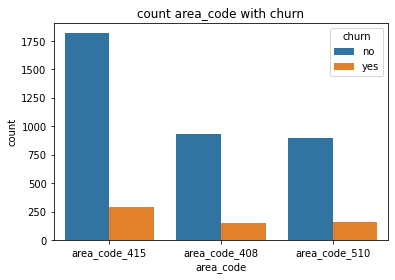

In [ ]:
sns.countplot(data = df_train, x='area_code', hue='churn').set(title='count area_code with churn')

<AxesSubplot:xlabel='churn', ylabel='count'>

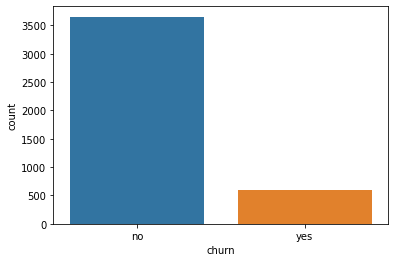

In [ ]:
sns.countplot(x=df_train['churn'])

In [ ]:
df_train.groupby(['state','churn'], as_index=False)[['area_code']].count().sort_values(by=['churn','area_code'],ascending=False)

,state,churn,area_code
63,NJ,yes,26
41,MD,yes,19
47,MN,yes,19
87,TX,yes,19
99,WV,yes,19
...,...,...,...
80,SC,no,58
0,AK,no,57
20,GA,no,57
24,IA,no,55


<AxesSubplot:xlabel='state', ylabel='area_code'>

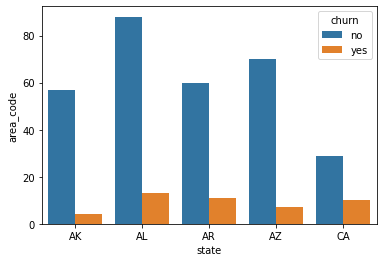

In [ ]:
sns.barplot(x='state', y='area_code', data=df_train.groupby(['state','churn'], as_index=False)[['area_code']].count()[0:10],hue='churn')

[Text(0.5, 1.0, 'count international_plan with churn ')]

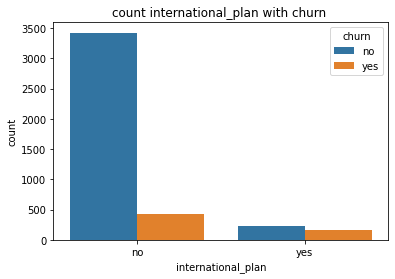

In [ ]:
sns.countplot(data = df_train, x='international_plan', hue='churn').set(title='count international_plan with churn ')

[Text(0.5, 1.0, 'count voice mail plan with churn')]

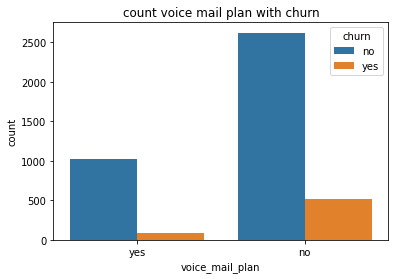

In [ ]:
sns.countplot(data = df_train, x='voice_mail_plan', hue='churn').set(title='count voice mail plan with churn')

In [ ]:
churn = df_train[df_train['churn'] == 'yes']
churn_area_state = churn.groupby(['area_code','state']).agg(
                        total_churn_state = ('state','count'),
                    ).sort_values(by='total_churn_state', ascending=False).reset_index().head(10)

[Text(0.5, 1.0, 'Total churn vs area_code by state')]

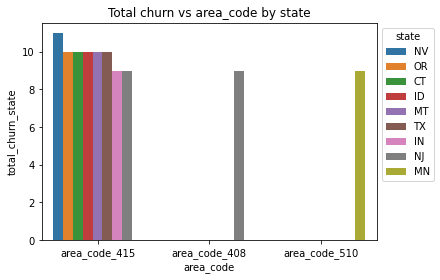

In [ ]:
ax = sns.barplot(x='area_code', y='total_churn_state', data=churn_area_state,hue='state')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title='Total churn vs area_code by state')

[Text(0.5, 1.0, 'Churn account_length')]

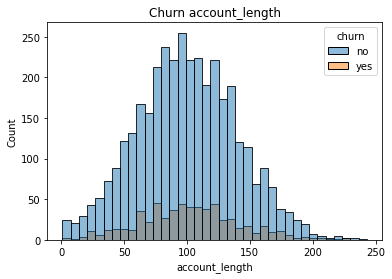

In [ ]:
sns.histplot(data=df_train, x='account_length', hue='churn').set(title='Churn account_length')

[Text(0.5, 1.0, 'Churn number_customer_service_calls')]

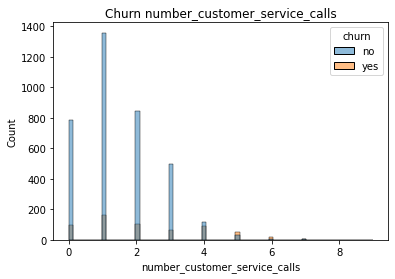

In [ ]:
sns.histplot(data=df_train, x='number_customer_service_calls', hue='churn').set(title='Churn number_customer_service_calls')

In [ ]:
# setting untuk visualisasi
from matplotlib import rcParams

rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

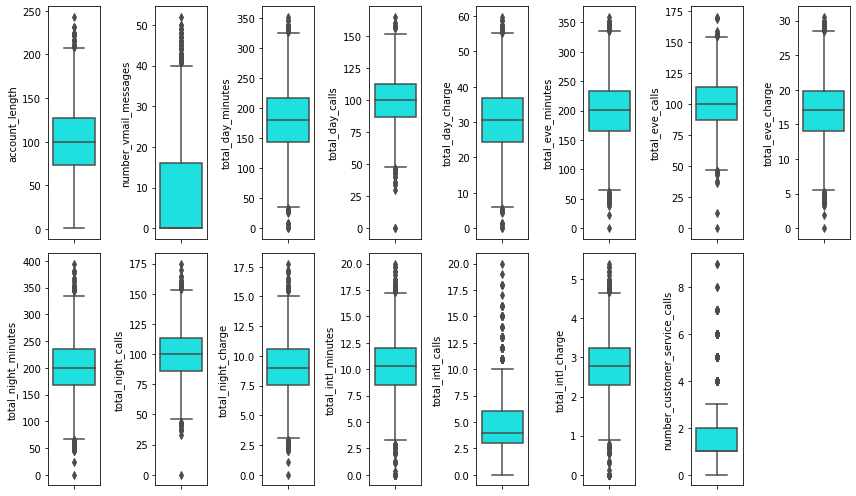

In [ ]:
plt.figure(figsize=(12,7))
# plotting
data = df_train
features = num
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.boxplot(y=data[features[i]], color='cyan')
    plt.tight_layout()

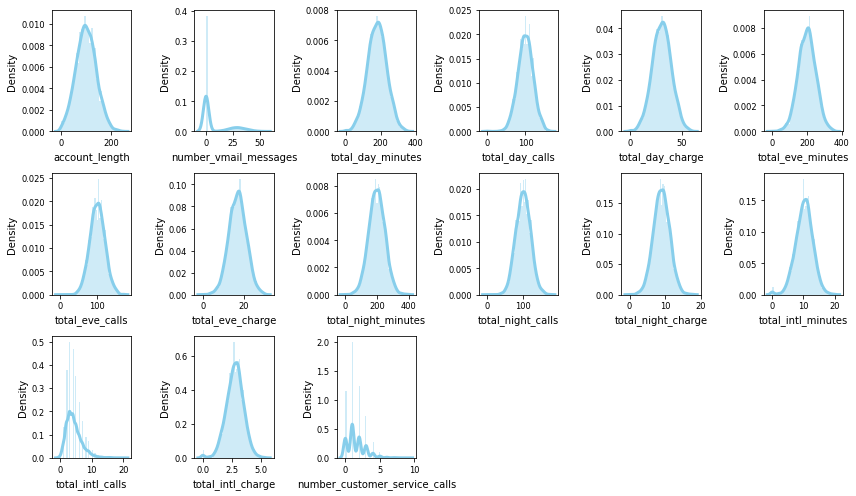

In [ ]:
plt.figure(figsize=(12,7))

data = df_train
features = num
for i in range(0, len(features)):
    plt.subplot(3, len(features)//3 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

<AxesSubplot:>

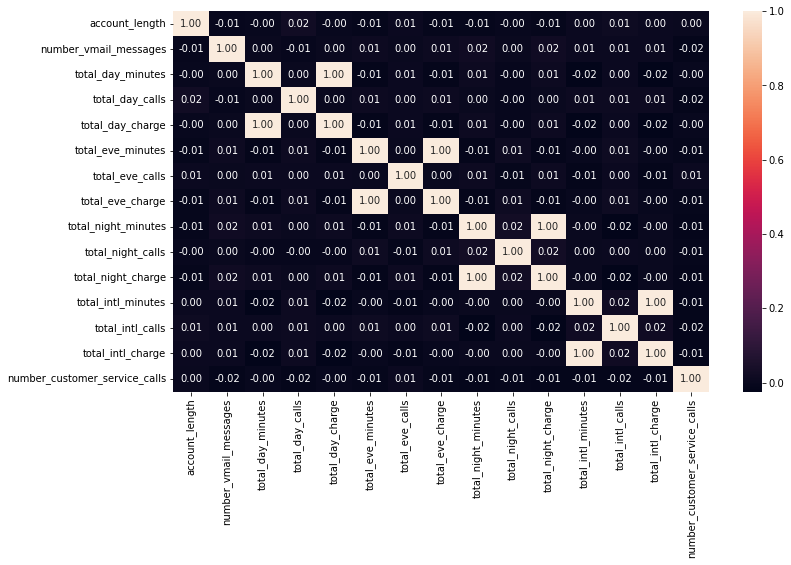

In [ ]:
# correlation heatmap
plt.figure(figsize=(12,7))
correlation = df_train.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

terlihat terdapat feature yang saling berkolerasi maka akan dilakukan drop pada kolom yang berkolerasi dan menetapkan 1 feature tersebut

In [ ]:
corr_matrix = df_train.corr().abs()
corr_matrix

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,0.006626,0.001612,0.023002,0.001613,0.010326,0.005535,0.010322,0.009916,0.001846,0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,0.006626,1.000000,0.002000,0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,0.015303
total_day_minutes,0.001612,0.002000,1.000000,0.000747,1.000000,0.013248,0.005986,0.013258,0.010049,0.004812,0.010036,0.021369,0.003859,0.021291,0.002925
total_day_calls,0.023002,0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,0.004815,0.002200,0.008834,0.009377,0.008909,0.015845
total_day_charge,0.001613,0.001994,1.000000,0.000751,1.000000,0.013247,0.005985,0.013257,0.010053,0.004816,0.010040,0.021374,0.003853,0.021296,0.002932
total_eve_minutes,0.010326,0.010725,0.013248,0.008661,0.013247,1.000000,0.003101,1.000000,0.014018,0.011973,0.014031,0.003509,0.012239,0.003460,0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,0.011929,0.008441,0.013096,0.004949,0.013145,0.006956
total_eve_charge,0.010322,0.010736,0.013258,0.008663,0.013257,1.000000,0.003120,1.000000,0.014022,0.011971,0.014035,0.003512,0.012239,0.003463,0.010071
total_night_minutes,0.009916,0.018308,0.010049,0.002206,0.010053,0.014018,0.008425,0.014022,1.000000,0.023815,0.999999,0.000113,0.024280,0.000047,0.013771
total_night_calls,0.001846,0.001977,0.004812,0.004815,0.004816,0.011973,0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,0.008893


In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,NaN,0.006626,0.001612,0.023002,0.001613,0.010326,0.005535,0.010322,0.009916,0.001846,0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,NaN,NaN,0.002000,0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,0.015303
total_day_minutes,NaN,NaN,NaN,0.000747,1.000000,0.013248,0.005986,0.013258,0.010049,0.004812,0.010036,0.021369,0.003859,0.021291,0.002925
total_day_calls,NaN,NaN,NaN,NaN,0.000751,0.008661,0.003739,0.008663,0.002206,0.004815,0.002200,0.008834,0.009377,0.008909,0.015845
total_day_charge,NaN,NaN,NaN,NaN,NaN,0.013247,0.005985,0.013257,0.010053,0.004816,0.010040,0.021374,0.003853,0.021296,0.002932
total_eve_minutes,NaN,NaN,NaN,NaN,NaN,NaN,0.003101,1.000000,0.014018,0.011973,0.014031,0.003509,0.012239,0.003460,0.010063
total_eve_calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003120,0.008425,0.011929,0.008441,0.013096,0.004949,0.013145,0.006956
total_eve_charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014022,0.011971,0.014035,0.003512,0.012239,0.003463,0.010071
total_night_minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023815,0.999999,0.000113,0.024280,0.000047,0.013771
total_night_calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023798,0.001093,0.003851,0.001054,0.008893


In [ ]:
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

['total_day_charge',
 'total_eve_charge',
 'total_night_charge',
 'total_intl_charge']

In [ ]:
df_train.drop(to_drop_hicorr, axis=1, inplace=True)

In [ ]:
df_train.shape

(4250, 16)

# Feature enginerring

In [ ]:
df_train['area_code'][0][-3:]

'415'

mengubah kolom area code menjadi numrikal dengan mengambil 3 angka di belakangnya

In [ ]:
#mengambil 3 angka pada kolom string
df_train['area_code'] = df_train['area_code'].apply(lambda x: x[-3:])

#mengubah type data string menjadi numerikal
df_train['area_code'] = df_train['area_code'].astype(int)
df_train['area_code'].head()

0    415
1    415
2    408
3    415
4    510
Name: area_code, dtype: int32

In [ ]:
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
1,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
2,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
3,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no
4,MA,121,510,no,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,415,no,no,0,188.3,70,243.8,88,213.7,79,10.3,6,0,no
4246,WV,73,408,no,no,0,177.9,89,131.2,82,186.2,89,11.5,6,3,no
4247,NC,75,408,no,no,0,170.7,101,193.1,126,129.1,104,6.9,7,1,no
4248,HI,50,408,no,yes,40,235.7,127,223.0,126,297.5,116,9.9,5,2,no


In [ ]:
yes_no_dict = {
    'yes':1,
    'no':0
}
col_yes_no = df_train[['international_plan', 'voice_mail_plan', 'churn']]
for colname in col_yes_no.columns:
    col_yes_no[colname] = col_yes_no[colname].map(yes_no_dict)

In [ ]:
col_yes_no

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
4245,0,0,0
4246,0,0,0
4247,0,0,0
4248,0,1,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int32  
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_eve_minutes              4250 non-null   float64
 9   total_eve_calls                4250 non-null   int64  
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_intl_minutes             4250 non-null   f

In [ ]:
num, cat = col_num_cat(df_train)

In [ ]:
num

['account_length',
 'area_code',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'number_customer_service_calls']

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df_train[num]), columns=num)

In [ ]:
std.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,0.170399,-0.517230,1.366857,-0.345510,1.163449,-0.093025,0.141841,1.070003,0.157309,1.247901,-0.579164,-0.426346
1,0.926186,-0.517230,-0.567911,1.169136,0.710014,-1.571820,0.493490,-0.753320,0.207083,0.704379,0.232927,-1.188960
2,-0.409038,-0.683191,-0.567911,2.206058,-1.456398,-2.752070,-0.611691,-0.072057,-0.539526,-1.324770,1.045017,0.336268
3,-0.635774,-0.517230,-0.567911,-0.251076,0.659633,-1.032448,1.096316,-0.270676,1.053239,-0.056552,-0.579164,1.098882
4,0.523099,1.735100,1.218029,0.702522,-0.599910,2.952139,0.393019,0.239775,0.903917,-0.998657,1.045017,1.098882


In [ ]:
onehot = pd.get_dummies(df_train[['state']], columns = ['state'])
onehot

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_model = pd.concat([onehot, std, col_yes_no], axis=1)
data_model

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,international_plan,voice_mail_plan,churn
0,0,0,0,0,0,0,0,0,0,0,...,-0.093025,0.141841,1.070003,0.157309,1.247901,-0.579164,-0.426346,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,-1.571820,0.493490,-0.753320,0.207083,0.704379,0.232927,-1.188960,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,-2.752070,-0.611691,-0.072057,-0.539526,-1.324770,1.045017,0.336268,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,-1.032448,1.096316,-0.270676,1.053239,-0.056552,-0.579164,1.098882,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2.952139,0.393019,0.239775,0.903917,-0.998657,1.045017,1.098882,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,0,0,0,0,0,0,0,0,...,0.868291,-0.611691,0.261623,-1.037264,0.015918,0.638972,-1.188960,0,0,0
4246,0,0,0,0,0,0,0,0,0,0,...,-1.372790,-0.913104,-0.284579,-0.539526,0.450735,0.638972,1.098882,0,0,0
4247,0,0,0,0,0,0,0,0,0,0,...,-0.140792,1.297257,-1.418694,0.207083,-1.216066,1.045017,-0.426346,0,0,0
4248,0,0,0,0,0,0,0,0,0,0,...,0.454308,1.297257,1.926052,0.804369,-0.129022,0.232927,0.336268,0,1,0


In [ ]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_AK                       4250 non-null   uint8  
 1   state_AL                       4250 non-null   uint8  
 2   state_AR                       4250 non-null   uint8  
 3   state_AZ                       4250 non-null   uint8  
 4   state_CA                       4250 non-null   uint8  
 5   state_CO                       4250 non-null   uint8  
 6   state_CT                       4250 non-null   uint8  
 7   state_DC                       4250 non-null   uint8  
 8   state_DE                       4250 non-null   uint8  
 9   state_FL                       4250 non-null   uint8  
 10  state_GA                       4250 non-null   uint8  
 11  state_HI                       4250 non-null   uint8  
 12  state_IA                       4250 non-null   u

# melakukan split data

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data_model, 
                                     test_size = 0.25, random_state = 1) 

In [ ]:
x_train_data = df_train.loc[:, df_train.columns!='churn']
y_train_data = df_train.loc[:, df_train.columns=='churn']

x_test_data = df_test.loc[:, df_test.columns!='churn']
y_test_data = df_test.loc[:, df_test.columns=='churn']

# permodelan
pada tahap ini akan dilakukan permodelan machine learning yang akan digunakan ialah:

1. Random Forest Classifier
2. Decision Tree Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    print('-----')
    print('ROC AUC')
    
    plot_roc_curve(model, x_test, y_test)
    print('Area under Curve of the ROC:', roc_auc_score(y_test,
                                                       model.predict_proba(x_test)[:,1]))

Accuracy: 0.9397930385700847
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       909
           1       0.94      0.62      0.75       154

    accuracy                           0.94      1063
   macro avg       0.94      0.81      0.86      1063
weighted avg       0.94      0.94      0.93      1063

------
Assuming 1 as positive, we get:

True Positive: 96
True Negative: 903
False Positive: 6
False Negative: 58

Precision: 0.9411764705882353
Recall: 0.6233766233766234
F1-Score: 0.7499999999999999
-----
ROC AUC
Area under Curve of the ROC: 0.9240566913834241


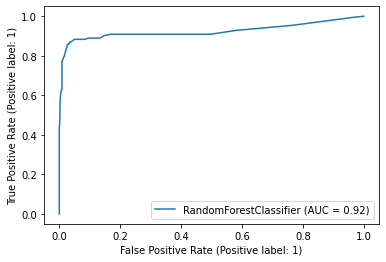

In [ ]:
rfc_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
rfc_model.fit(x_train_data, y_train_data)
evaluate(rfc_model)

Accuracy: 0.9238005644402634
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       909
           1       0.72      0.77      0.75       154

    accuracy                           0.92      1063
   macro avg       0.84      0.86      0.85      1063
weighted avg       0.93      0.92      0.92      1063

------
Assuming 1 as positive, we get:

True Positive: 119
True Negative: 863
False Positive: 46
False Negative: 35

Precision: 0.7212121212121212
Recall: 0.7727272727272727
F1-Score: 0.7460815047021943
-----
ROC AUC
Area under Curve of the ROC: 0.861061106110611


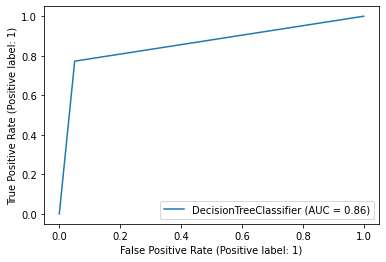

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_data, y_train_data)
evaluate(dt)

maka pada tahap ini pemilihan model pada random forest sebagai model terbaik dengan akurasi 0.9397 dengan precision tertinggi dengan nilai 0.94117
maka dari itu pada tahap selanjunya akan dilakukan prediksi pada data test

# Predict data test

In [ ]:
# melihat data test
test = pd.read_csv('test.csv')
test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
rfc_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
rfc_model.fit(x_train_data, y_train_data)
rfc_model

RandomForestClassifier(n_jobs=-1, random_state=1)

In [ ]:
def pre_model_1(data,model):
    test = data.copy()
    drop_feature = [
        # drop id
        'id',

        # Drop feature high correlation but left 1 feature
        'total_day_charge',
        'total_eve_charge',
        'total_night_charge',
        'total_intl_charge'
    ]

    test.drop(drop_feature, axis=1, inplace=True)

    # Feature enginerring

    # get 3 number form area_code
    test['area_code'] = test['area_code'].apply(lambda x: x[-3:])

    # convert type string data to integer
    test['area_code'] = test['area_code'].astype(int)

    # Feature scaling standarization
    num = [
     'account_length','area_code',
     'number_vmail_messages',
     'total_day_minutes',
     'total_day_calls',
     'total_eve_minutes',
     'total_eve_calls',
     'total_night_minutes',
     'total_night_calls',
     'total_intl_minutes',
     'total_intl_calls',
     'number_customer_service_calls']

    ss = StandardScaler()
    std = pd.DataFrame(ss.fit_transform(test[num]), columns=num)

    # Onhot Encoder
    onehot = pd.get_dummies(test[['state']], columns = ['state'])
    onehot

    # Label Encoder Yes and No
    yes_no_dict = {
        'yes':1,
        'no':0
    }
    col_yes_no = test[['international_plan', 'voice_mail_plan']]
    for colname in col_yes_no.columns:
        col_yes_no[colname] = col_yes_no[colname].map(yes_no_dict)

    # Transformed dataframe
    data_test_model = pd.concat([onehot, std, col_yes_no], axis=1)

    # predict machine learning with Random Forest Classifier
    result = model.predict(data_test_model)
    return result

In [ ]:
test['churn_predict'] = pre_model_1(test,rfc_model)
test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn_predict
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,0
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


<AxesSubplot:xlabel='churn_predict', ylabel='count'>

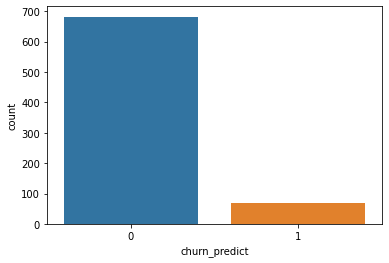

In [ ]:
sns.countplot(test['churn_predict'])

In [ ]:
test['churn_predict'].value_counts()

0    682
1     68
Name: churn_predict, dtype: int64